# <center>Визуализация 👀</center>

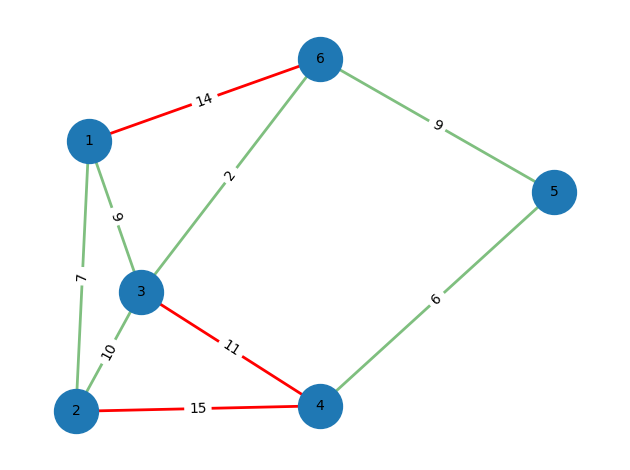

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# внешние данные
# graph.add_nodes_from()
# graph.add_weighted_edges_from()

G = nx.Graph()

def add_edge(f_item, s_item, w, graph = None):
    graph.add_edge(f_item, s_item, weight = w)
    graph.add_edge(s_item, f_item, weight = w)

add_edge('1', '2', 7, graph = G)
add_edge('1', '6', 14, graph = G)
add_edge('1', '3', 9, graph = G)
add_edge('2', '3', 10, graph = G)
add_edge('2', '4', 15, graph = G)
add_edge('3', '6', 2, graph = G)
add_edge('3', '4', 11, graph = G)
add_edge('4', '5', 6, graph = G)
add_edge('5', '6', 9, graph = G)

# вершины (nodes)
pos = nx.spring_layout(G, seed = 7)  # positions for all nodes - seed for reproducibility
nx.draw_networkx_nodes(G, pos, node_size = 1000)

# ребра (edges)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 10]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 10]
nx.draw_networkx_edges(G, pos, edgelist = elarge, width = 2, edge_color = "red")
nx.draw_networkx_edges(G, pos, edgelist = esmall, width = 2,
                       alpha = 0.5, edge_color = "green") # style = "dashed"

# подписи вершин
nx.draw_networkx_labels(G, pos, font_size = 10, font_family = "sans-serif")
# подписи весов
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# <center>алгоритм Дейкстры</center>

In [33]:
def dijkstra_algorithm_v1(graph, neighbors_lst, start_node):

    unvisited_nodes = ['1', '2', '3', '4', '5', '6']     # массив a
    shortest_path = {}                                   # массив b
    previous_nodes = {}                                  # массив с
    
    for node in unvisited_nodes:
        shortest_path[node] = 1000
   
    shortest_path[start_node] = 0 # значение начального узла 0
    
    # условие выхода из цикла - все вершины пройдены
    while unvisited_nodes:

        # ищем узел с наименьшим значением
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
        
        # извлекаем соседей текущего узла и обновляем их расстояния
        neighbors = neighbors_lst[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph[current_min_node][neighbor]
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # после посещения соседей - отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path


def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # добавим начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

In [34]:
# зададим граф
graph = {
'1': {'2': 7, '3': 9, '6': 14},
'2': {'1': 7, '3': 10, '4': 15},
'3': {'1': 6, '2': 10, '4': 11, '6': 2},
'4': {'2': 15, '3': 11, '5': 6},
'5': {'4': 6, '6': 9},
'6': {'1': 14, '3': 2, '5': 9}
}

# зададим соседей для каждой вершины
neighbors_lst = {}
for i in graph:
    neighbors_lst[i] = []
    for j in graph[i]:
        neighbors_lst[i].append(j)

previous_nodes, shortest_path = dijkstra_algorithm_v1(graph, neighbors_lst, start_node = "5")

print_result(previous_nodes, shortest_path, start_node = "5", target_node = "1")

Найден следующий лучший маршрут с ценностью 17.
5 -> 6 -> 3 -> 1


# <center>алгоритм Дейкстры через Class</center>

In [3]:
import sys # для бесконечности


# создадим класс
class Graph(object):

    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
    

    def construct_graph(self, nodes, init_graph):
        '''реализуем граф, как словарь
           ключи - вершины
           значения - рёбра'''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    

    # возвращает узлы графа
    def get_nodes(self):
        return self.nodes
    

    # возвращает соседей
    def get_outgoing_edges(self, node):
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    
    # возвращает значение ребра
    def value(self, node1, node2):
        return self.graph[node1][node2]

In [21]:
def dijkstra_algorithm(graph, start_node):
    '''Функция принимает два аргумента:
        1. graph — это экземпляр класса Graph
        2. start_node — узел, с которого мы начнем'''

    unvisited_nodes = list(graph.get_nodes())   # массив a
    shortest_path = {}                          # массив b
    previous_nodes = {}                         # массив с
       
    max_value = sys.maxsize # max_value для значения "бесконечности" непосещенных узлов
    for node in unvisited_nodes:
        shortest_path[node] = max_value
   
    shortest_path[start_node] = 0 # значение начального узла 0
    
    # условие выхода из цикла - все вершины пройдены
    while unvisited_nodes:
        # ищем узел с наименьшим значением
        current_min_node = None
        
        # ищем самое короткое ребро
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
        
        # извлекаем соседей текущего узла и обновляем их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # обнавляем путь
                previous_nodes[neighbor] = current_min_node
 
        # после посещения соседей - отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path


def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # добавим начальный узел вручную
    path.append(start_node)
    
    print(f"Найден следующий лучший маршрут с ценностью {shortest_path[target_node]}")
    print(" -> ".join(reversed(path)))

In [32]:
nodes = ["1", "2", "3", "4", "5", "6"]
 
init_graph = {}
for node in nodes:
    init_graph[node] = {}

init_graph["1"]["2"] = 7
init_graph["1"]["6"] = 14
init_graph["1"]["3"] = 6
init_graph["2"]["3"] = 10
init_graph["2"]["4"] = 15
init_graph["3"]["6"] = 2
init_graph["3"]["4"] = 11
init_graph["4"]["5"] = 6
init_graph["5"]["6"] = 9

# обращаемся к классу
graph = Graph(nodes, init_graph)

previous_nodes, shortest_path = dijkstra_algorithm(graph = graph, start_node = "5")

print_result(previous_nodes, shortest_path, start_node = "5", target_node = "1")

Найден следующий лучший маршрут с ценностью 17
5 -> 6 -> 3 -> 1
